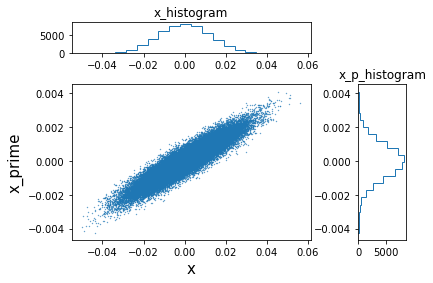

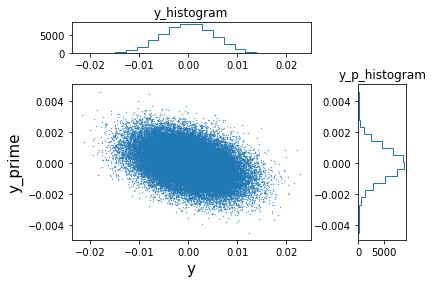

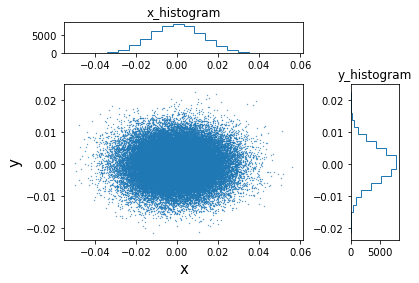

In [3]:
# --------------------------Problem01 -----------------------------------------------------------------
# Generate bunch distribution and plot (horizontal, vertical, and cross-section) phase spaces with projections (10pts)

import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import tables


# --------------------------data 불러오기-----------------------------------------------------------------

h5file = tables.open_file("/home/hjm/Downloads/Midterm_HJM/data/particles.h5", mode = "r")
particle=h5file.root.particles.read()

x = particle[:,0]
x_p=particle[:,1]
y = particle[:,2]
y_p= particle[:,3]


# GridSpec 명령어를 사용하지 않으면 동일한 크기의 sub-plot이 생성된다. 그래프의 사이즈를 보다 편하게 설정하기 위해서 GridSpec 명령어를 사용.
# --------------------------GridSpec 라이브러리를 사용할 때 x,x' 그래프---------------------------------------

fig1 = plt.figure()
# fig1.suptitle("x,x' Graph",fontsize=16)
fig1.subplots_adjust(hspace=1,wspace=1)
gs = GridSpec(4, 4)


ax_scatter = fig1.add_subplot(gs[1:4, 0:3])
ax_scatter.scatter(x, x_p,s=0.1)
ax_scatter.set_xlabel('x', size='15')
ax_scatter.set_ylabel('x_prime', size='15')


ax_hist_x = fig1.add_subplot(gs[0,0:3])
ax_hist_x.hist(x, 20, histtype='step', orientation = 'vertical')
ax_hist_x.set_title('x_histogram')

ax_hist_x_p = fig1.add_subplot(gs[1:4, 3])
ax_hist_x_p.hist(x_p, 20, histtype='step', orientation = 'horizontal')
ax_hist_x_p.set_title('x_p_histogram')


# --------------------------GridSpec 라이브러리를 사용할 때 y,y' 그래프---------------------------------------


fig2 = plt.figure()
# fig2.suptitle("y,y' Graph",fontsize=16)
fig2.subplots_adjust(hspace=1,wspace=1)
gs = GridSpec(4, 4)


ax_scatter = fig2.add_subplot(gs[1:4, 0:3])
ax_scatter.scatter(y, y_p,s=0.1)
ax_scatter.set_xlabel('y', size='15')
ax_scatter.set_ylabel('y_prime', size='15')




ax_hist_x = fig2.add_subplot(gs[0,0:3])
ax_hist_x.hist(y, 20, histtype='step', orientation = 'vertical')
ax_hist_x.set_title('y_histogram')

ax_hist_x_p = fig2.add_subplot(gs[1:4, 3])
ax_hist_x_p.hist(y_p, 20, histtype='step', orientation = 'horizontal')
ax_hist_x_p.set_title('y_p_histogram')



# --------------------------GridSpec 라이브러리를 사용할 때 x,y 그래프---------------------------------------


fig3 = plt.figure()
# fig3.suptitle("x,y Graph",fontsize=16)
fig3.subplots_adjust(hspace=1,wspace=1)
gs = GridSpec(4, 4)


ax_scatter = fig3.add_subplot(gs[1:4, 0:3])
ax_scatter.scatter(x, y,s=0.1)
ax_scatter.set_xlabel('x', size='15')
ax_scatter.set_ylabel('y', size='15')


ax_hist_x = fig3.add_subplot(gs[0,0:3])
ax_hist_x.hist(x, 20, histtype='step', orientation = 'vertical')
ax_hist_x.set_title('x_histogram')

ax_hist_x_p = fig3.add_subplot(gs[1:4, 3])
ax_hist_x_p.hist(y, 20, histtype='step', orientation = 'horizontal')
ax_hist_x_p.set_title('y_histogram')

plt.show()







In [64]:
# --------------------------Problem02 -----------------------------------------------------------------
# Compute turn-by-turn(tbt) particle data for 200 turns (5 pts)
# .py에서만 작동

import time
import webbrowser


url = 'https://www.sirepo.com/download-data-file/synergia/Gy8exKAz/bunchAnimation'
# sirepo에서 synergia 시뮬레이션 진행 후 부여되는 고유 url(Gy8exKAz)을 얻어 100turn까지 자동으로 다운로드 
# bunchAnimation 대신 twissReport2 / turnComparisonAnimation등 필요한 데이터를 순차적으로 다운로드 할 수 있으나 
# Beam Diagnostics per Turn Period값을 1로 설정하였기에 bunchAnimation만 진행

# 사용하는 운영체제에 따른 크롬 인터넷 브라우저의 설치 경로 크롬 이외의 브라우저는 설치된 경로 변경 필요

# 윈도우
chrome_path = 'C:/Program Files/Google/Chrome/Application/chrome.exe %s'
# 맥OS
#chrome_path = 'open -a /Applications/Google\ Chrome.app %s'
# 리눅스
#chrome_path = '/usr/bin/google-chrome %s'
 

for i in range(101):
    webbrowser.get(chrome_path).open('{}/{}'.format(url,i))
    time.sleep(1)



<function matplotlib.pyplot.show(close=None, block=None)>

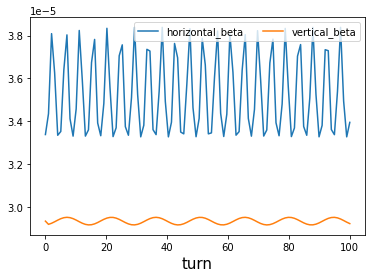

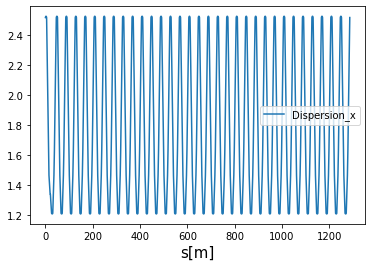

In [172]:
# --------------------------Problem03 -----------------------------------------------------------------
# Plot Twiss parameters 𝛼𝑥, 𝛽𝑥, 𝐷𝑥, 𝛼𝑦, 𝛽𝑦, 𝐷𝑦 for 5 turns (15 pts)

num_turn = 100
# synergia의 visualization과 비교하기 위해 100회 및 모든 particle의 dispertion으로 범위 설정

horizontal_beta=[]
vertical_beta=[]


# x,x'의 위상에 대한 정보로 twiss parameter와 emittance를 covariance matrix를 통해 구할 수 있었던 반면 
# dispersion은 lattice에 대한 추가적인 정보가 필요함(혹은 sector dipole, strong&weak focusing quad에 대한 정보가 필요)
# lattice를 기반으로 계산한 dispertion에 대한 정보를 twiss file에서 불러와 plot
file = "/home/hjm/Downloads/Midterm_HJM/data/twiss.h5"
h5file = tables.open_file(file, mode = "r")
disp_x=h5file.root.D_x.read()
D_x = disp_x[0:len(disp_x)]
disp_y=h5file.root.D_x.read()
D_y = disp_y[0:len(disp_y)]


for i in range(num_turn):
    file = "/home/hjm/Downloads/Midterm_HJM/data/particles_"
    
    if len(str(i))==1:
        h5file = tables.open_file('{}000{}.h5'.format(file,i), mode = "r")
    if len(str(i))==2:
        h5file = tables.open_file('{}00{}.h5'.format(file,i), mode = "r")          
    if i == 100:
        h5file = tables.open_file('{}0{}.h5'.format(file,i), mode = "r")
    
    particle=h5file.root.particles.read()    
    x = particle[:,0]
    x_p=particle[:,1]
    y = particle[:,2]
    y_p= particle[:,3]
    
    emittance_x = 5
    emittance_y = 5

    alpha_x = -np.mean(x*x_p)/emittance_x
    beta_x = np.mean(x**2)/emittance_x
    horizontal_beta.append(beta_x)
    gamma_x = np.mean(x_p**2)/emittance_x

    alpha_y = -np.mean(y*y_p)/emittance_y
    beta_y = np.mean(y**2)/emittance_y*5
    # vertical beta와 horizontal beta의 order를 맞추기 위해 임으로 5를 곱함
    vertical_beta.append(beta_y)
    gamma_y = np.mean(y_p**2)/emittance_y   
    
    
#     print('{}_x'.format(i),' ',alpha_x,' ',beta_x,' ',gamma_x)
#     print('{}_y'.format(i),' ',alpha_y,' ',beta_y,' ',gamma_y)


turn =np.linspace(0,num_turn,num_turn)

fig4 = plt.figure()
ax = fig4.add_subplot()
 
ax.plot(turn,horizontal_beta)
ax.plot(turn,vertical_beta)
ax.set_xlabel('turn', size='15')
ax.legend(['horizontal_beta','vertical_beta'],ncol=2)

s =np.linspace(0,len(disp_x),len(disp_x))
fig5 = plt.figure()
ax = fig5.add_subplot()
 
ax.plot(s,D_x)
# ax.plot(turn,D_y)
#  Twiss.h5 파일상 이 값은 0
ax.set_xlabel('s[m]', size='15')
ax.legend(['Dispersion_x'],ncol=2)




plt.show

In [149]:
# --------------------------Problem03 참고-----------------------------------------------------------------
# 수업시간에 진행해주신 covariance matrix를 설정하여 그에 맞는 평균값의 랜덤한 입자 생성 코드

# Twiss parameters#
ax = -0.5
bx = 1.3
cx = 2.1
ex = 3.1
twiss = np.array([ax, bx, cx, ex])

# Covariance matrix
s11 = ex * bx
s12 = - ex * ax
s22 = ex * cx
cov = np.zeros((2,2))
cov[0,0] = s11
cov[0,1] = s12
cov[1,0] = s12
cov[1,1] = s22

# beam distribution
mean = [np.sqrt(s11), np.sqrt(s22)]
Np = 10000
coords = np.random.multivariate_normal(mean, cov, Np)

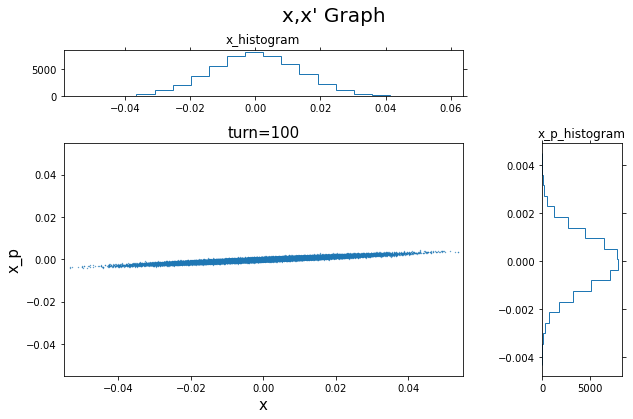

In [183]:
# --------------------------Problem04 -----------------------------------------------------------------
#Save tbt particle data for all turns and create an animation of phase space evolutions for horizontal, vertical and cross-section planes (20 pts)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.animation import FuncAnimation
from IPython.display import HTML


file = "/home/hjm/Downloads/Midterm_HJM/data/particles_"


# 확인하고자 하는 동영상의 기초 frame 
#x,x' graph frame
fig = plt.figure(figsize=(10,6))
fig.suptitle("x,x' Graph", size=20)
fig.subplots_adjust(hspace=1,wspace=1)
gs = GridSpec(4, 4)

ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_scatter.set_xlabel('x', size='15')
ax_scatter.set_ylabel('x_p', size='15')

ax_hist_x = fig.add_subplot(gs[0,0:3])
ax_hist_x_p = fig.add_subplot(gs[1:4, 3])


##y,y' graph frame
# fig2 = plt.figure(figsize=(10,6))
# fig2.suptitle("y,y' Graph", size=20)
# fig2.subplots_adjust(hspace=1,wspace=1)
# gs = GridSpec(4, 4)

# ay_scatter = fig2.add_subplot(gs[1:4, 0:3])
# ay_scatter.set_xlabel('y', size='15')
# ay_scatter.set_ylabel('y_p', size='15')

# ay_hist_y = fig2.add_subplot(gs[0,0:3])
# ay_hist_y_p = fig2.add_subplot(gs[1:4, 3])


##x,y graph frame
# fig3 = plt.figure(figsize=(10,6))
# fig3.suptitle("x,y Graph", size=20)
# fig3.subplots_adjust(hspace=1,wspace=1)
# gs = GridSpec(4, 4)


# axy_scatter = fig3.add_subplot(gs[1:4, 0:3])
# axy_scatter.set_xlabel('x', size='15')
# axy_scatter.set_ylabel('y', size='15')

# axy_hist_x = fig3.add_subplot(gs[0,0:3])
# axy_hist_y = fig3.add_subplot(gs[1:4, 3])




def update_x(i):    
    ax_hist_x.clear()
    ax_hist_x_p.clear()
    
    if len(str(i))==1:
        h5file = tables.open_file('{}000{}.h5'.format(file,i), mode = "r")
    if len(str(i))==2:
        h5file = tables.open_file('{}00{}.h5'.format(file,i), mode = "r")          
    if i == 100:
        h5file = tables.open_file('{}0{}.h5'.format(file,i), mode = "r")
      
    
    particle = h5file.root.particles.read()    
    x = particle[:,0]
    x_p=particle[:,1]

    graph_x.set_offsets(np.c_[x[:], x_p[:]])
    
    ax_scatter.set_title('turn={}'.format(i), size='15')
    ax_hist_x.set_title('x_histogram')
    ax_hist_x.hist(x, 20, histtype='step', orientation = 'vertical')
    ax_hist_x_p.set_title('x_p_histogram')
    ax_hist_x_p.hist(x_p, 20, histtype='step', orientation = 'horizontal')

#     print('{}/{}/{}'.format(file,i,x[1]))
#     제대로 불러오는지 확인하고자함

    
def update_y(i):    
    ay_hist_y.clear()
    ay_hist_y_p.clear()
    
    if len(str(i))==1:
        h5file = tables.open_file('{}000{}.h5'.format(file,i), mode = "r")
    if len(str(i))==2:
        h5file = tables.open_file('{}00{}.h5'.format(file,i), mode = "r")          
    if i == 100:
        h5file = tables.open_file('{}0{}.h5'.format(file,i), mode = "r")


    particle = h5file.root.particles.read()    
    y = particle[:,2]
    y_p= particle[:,3]
    
    graph_y.set_offsets(np.c_[y[:], y_p[:]])

    ay_scatter.set_title('turn={}'.format(i), size='15')
    ay_hist_y.set_title('y_histogram')
    ay_hist_y.hist(y, 20, histtype='step', orientation = 'vertical')
    ay_hist_y_p.set_title('y_p_histogram')
    ay_hist_y_p.hist(y_p, 20, histtype='step', orientation = 'horizontal')


    
def update_xy(i):    
    axy_hist_x.clear()
    axy_hist_y.clear()
    
    if len(str(i))==1:
        h5file = tables.open_file('{}000{}.h5'.format(file,i), mode = "r")
    if len(str(i))==2:
        h5file = tables.open_file('{}00{}.h5'.format(file,i), mode = "r")          
    if i == 100:
        h5file = tables.open_file('{}0{}.h5'.format(file,i), mode = "r")
      
    
    particle = h5file.root.particles.read()    
    x = particle[:,0]
    y = particle[:,2]

    graph_xy.set_offsets(np.c_[x[:], y[:]])

    
    axy_scatter.set_title('turn={}'.format(i), size='15')
    axy_hist_x.set_title('x_histogram')
    axy_hist_x.hist(x, 20, histtype='step', orientation = 'vertical')
    axy_hist_y.set_title('y_histogram')
    axy_hist_y.hist(y, 20, histtype='step', orientation = 'horizontal')      
    
    
    
# 확인하고자 하는 동영상   

#x,x' graph animation
graph_x =ax_scatter.scatter([],[],s=0.1)
ani_x = matplotlib.animation.FuncAnimation(fig, update_x, frames=101, interval=100, blit=False)
HTML(ani_x.to_html5_video())

# # y,y' graph animation
# graph_y =ay_scatter.scatter([],[],s=0.1)
# ani_y = matplotlib.animation.FuncAnimation(fig2, update_y, frames=101, interval=100, blit=False)
# HTML(ani_y.to_html5_video())

## x,y graph animation
# graph_xy =axy_scatter.scatter([],[],s=0.1)
# ani_xy = matplotlib.animation.FuncAnimation(fig3, update_xy, frames=101, interval=100, blit=False)
# HTML(ani_xy.to_html5_video())

In [204]:
# --------------------------Problem05 -----------------------------------------------------------------
#  (Optional) Create phases space animations using ParaView (10 pts)

import numpy as np
import time
# import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


num_turn = 101


for i in range(num_turn):
    file = "/home/hjm/Downloads/Midterm_HJM/data/particles_"
    
    if len(str(i))==1:
        h5file = tables.open_file('{}000{}.h5'.format(file,i), mode = "r")
    if len(str(i))==2:
        h5file = tables.open_file('{}00{}.h5'.format(file,i), mode = "r")          
    if i == 100:
        h5file = tables.open_file('{}0{}.h5'.format(file,i), mode = "r")
    
    particle=h5file.root.particles.read()    
    x = particle[:,0]
    x_p=particle[:,1]
    y = particle[:,2]
    y_p= particle[:,3]
    z = particle[:,4]    
    position = np.column_stack((x,x_p,y,y_p,z))
#     print(position)
    np.savetxt('turn{}.txt'.format(i), position, fmt='%.18e', delimiter = ',', header="x,x',y,y',z")  
    time.sleep(0.5)

# h5 파일을 txt로 변환하였으며 이를 prarview를 이용하여 영상으로 저장



